In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML&AI with Python/Project/Restaurant_Reviews.tsv', delimiter='\t', encoding='utf8')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
ls= WordNetLemmatizer()
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ', data['Review'][i])
    review=review.lower()
    review=review.split()
    ls=WordNetLemmatizer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ls.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)
print(corpus)


['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1566)
#object of CountVectorizer needs imp parameter max_features decided after total no.of columns
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,-1].values
len(x[0])

1566

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.15, random_state = 88)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pr=knn.predict(x_te)

[[63  9]
 [21 57]]
0.8
[[63  9]
 [21 57]]


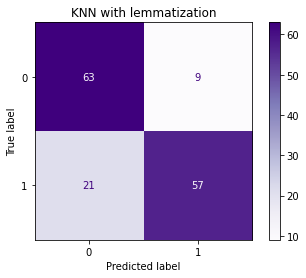

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_te, y_pr)
print(cm)
print(accuracy_score(y_te, y_pr))
disp = plot_confusion_matrix(knn, x_te, y_te,cmap=plt.cm.Purples)
disp.ax_.set_title('KNN with lemmatization')
print(disp.confusion_matrix)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
sc=StandardScaler()
x=sc.fit_transform(x)
for i in range (1,1000):
    x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.15, random_state = i)
    for j in range(1,6):
        knn=KNeighborsClassifier(n_neighbors=j,p=2,metric='minkowski')
        knn.fit(x_tr,y_tr)
        y_pr=knn.predict(x_te)
        acc=accuracy_score(y_te,y_pr)
        if acc>0.80:
            print(i,j,acc)